# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')




## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')
df.head(5)


market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [4]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_at'] = pd.to_datetime(df['created_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [5]:
# Convert categorical features to category type
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')
df['market_id'] = df['market_id'].astype('category')

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [6]:
# Calculate time taken in minutes
from datetime import timedelta

df['time_taken'] = df['actual_delivery_time'] - df['created_at']
df['time_taken'] = df['time_taken'] /timedelta(minutes=1)

df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  
0                      21.0     34.44        47.0  
1                       2.0     27.60        44.0  
2                      18.0     11.56        55.0  
3                       8.0     31.80        59.0  
4                       7.0      8.20        46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [7]:
# Extract the hour and day of week from the 'created_at' timestamp

df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek
df['isWeekend'] = df['day_of_week'].isin([5, 6]).astype('int64')
print(df[['created_at', 'hour', 'day_of_week', 'isWeekend']].head(20))

df['hour'] = df['hour'].astype('category')
df['isWeekend'] = df['isWeekend'].astype('category')



            created_at  hour  day_of_week  isWeekend
0  2015-02-06 22:24:17    22            4          0
1  2015-02-10 21:49:25    21            1          0
2  2015-02-16 00:11:35     0            0          0
3  2015-02-12 03:36:46     3            3          0
4  2015-01-27 02:12:36     2            1          0
5  2015-02-06 00:42:42     0            4          0
6  2015-02-08 02:04:17     2            6          1
7  2015-01-31 04:35:54     4            5          1
8  2015-01-31 02:21:23     2            5          1
9  2015-01-31 23:45:12    23            5          1
10 2015-02-17 03:13:20     3            1          0
11 2015-02-15 01:26:20     1            6          1
12 2015-02-02 05:27:49     5            0          0
13 2015-02-16 02:21:20     2            0          0
14 2015-02-13 01:01:58     1            4          0
15 2015-01-24 02:01:20     2            5          1
16 2015-02-10 04:36:39     4            1          0
17 2015-01-26 02:09:48     2            0     

In [8]:
# Drop unnecessary columns
df.drop(["created_at"],inplace=True,axis=1)
df.drop(["actual_delivery_time"],inplace=True,axis=1)
df.drop(["day_of_week"],inplace=True,axis=1)


In [237]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  time_taken                175777 non-null  float64 
 13  hour                      175

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [9]:
# Define target variable (y) and features (X)
y = df['time_taken']
X_columns = ['market_id', 'store_primary_category', 'order_protocol', 'total_items',
              'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_busy_dashers','total_onshift_dashers',
              'total_outstanding_orders', 'distance', 'hour','isWeekend']
X = df[X_columns]


In [292]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 9.294e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:02:05   Log-Likelihood:            -4.5484e+05
No. Observations:              175777   AIC:                         9.097e+05
Df Residuals:                  175762   BIC:                         9.099e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [10]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (140621, 14) (140621,)
Testing set size: (35156, 14) (35156,)


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical features
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Compute VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_cols
vif_data["VIF"] = [variance_inflation_factor(X_train[numerical_cols].values, i) for i in range(len(numerical_cols))]

# Display VIF values
print(vif_data)


                    Feature        VIF
0               total_items   5.623069
1                  subtotal   9.818612
2        num_distinct_items  11.892444
3            min_item_price   5.050781
4            max_item_price  10.977836
5        total_busy_dashers  29.705597
6     total_onshift_dashers  31.373345
7  total_outstanding_orders  21.655134
8                  distance   5.043566


In [18]:
X_train.drop(["total_onshift_dashers"],inplace=True,axis=1)
X_test.drop(["total_onshift_dashers"],inplace=True,axis=1)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical features
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Compute VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_cols
vif_data["VIF"] = [variance_inflation_factor(X_train[numerical_cols].values, i) for i in range(len(numerical_cols))]

# Display VIF values
print(vif_data)

                    Feature        VIF
0               total_items   5.623035
1                  subtotal   9.815887
2        num_distinct_items  11.873800
3            min_item_price   5.046921
4            max_item_price  10.966330
5        total_busy_dashers  20.209385
6  total_outstanding_orders  16.956076
7                  distance   5.018378


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [20]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical Columns: ['market_id', 'store_primary_category', 'order_protocol', 'hour', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

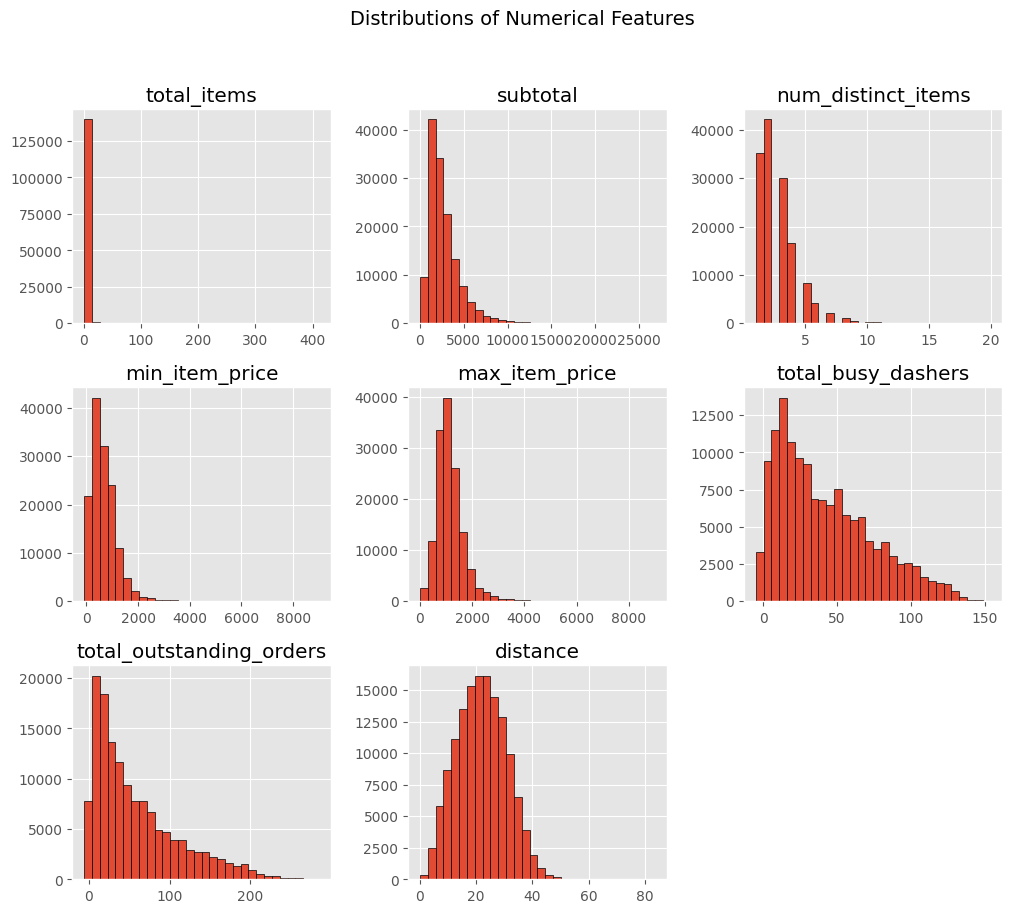

In [21]:
# Plot distributions for all numerical columns

plt.style.use('ggplot')
X_train[numerical_cols].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Distributions of Numerical Features", fontsize=14)
plt.show()



##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

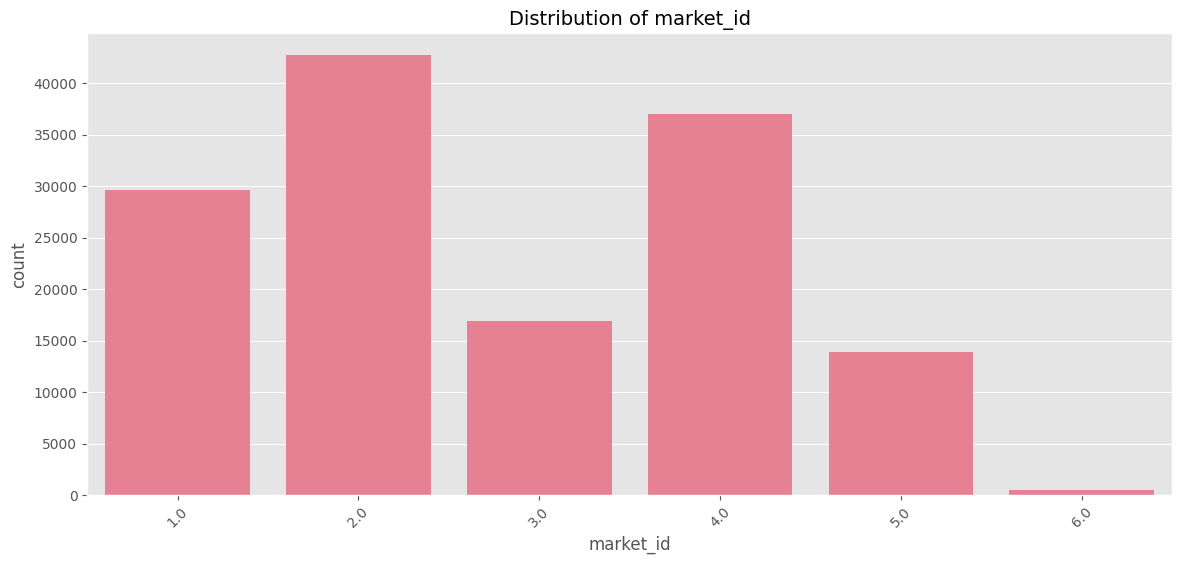

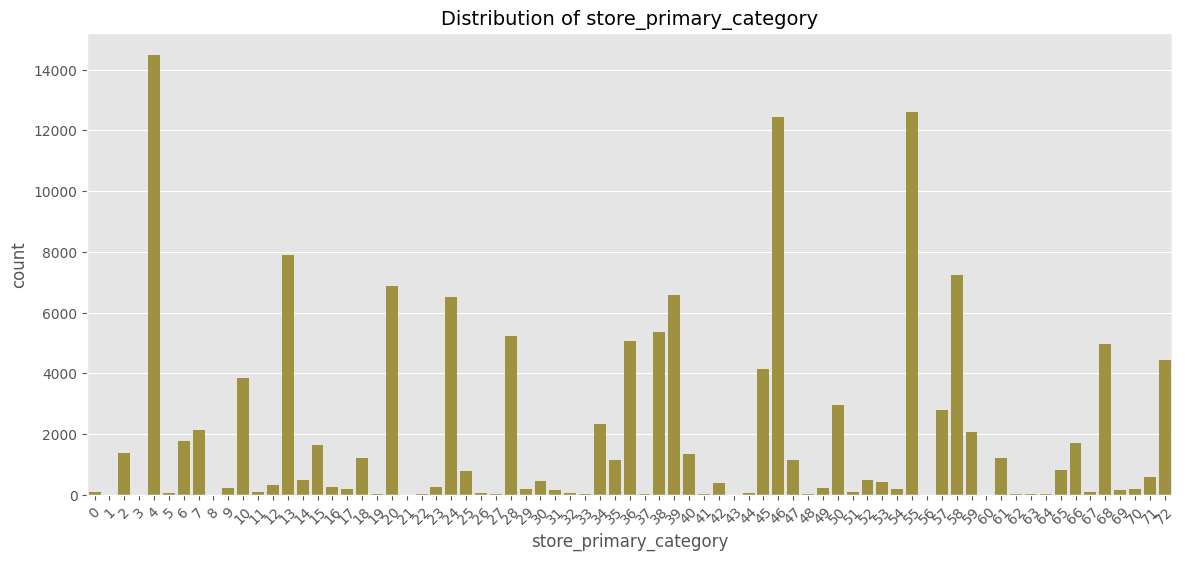

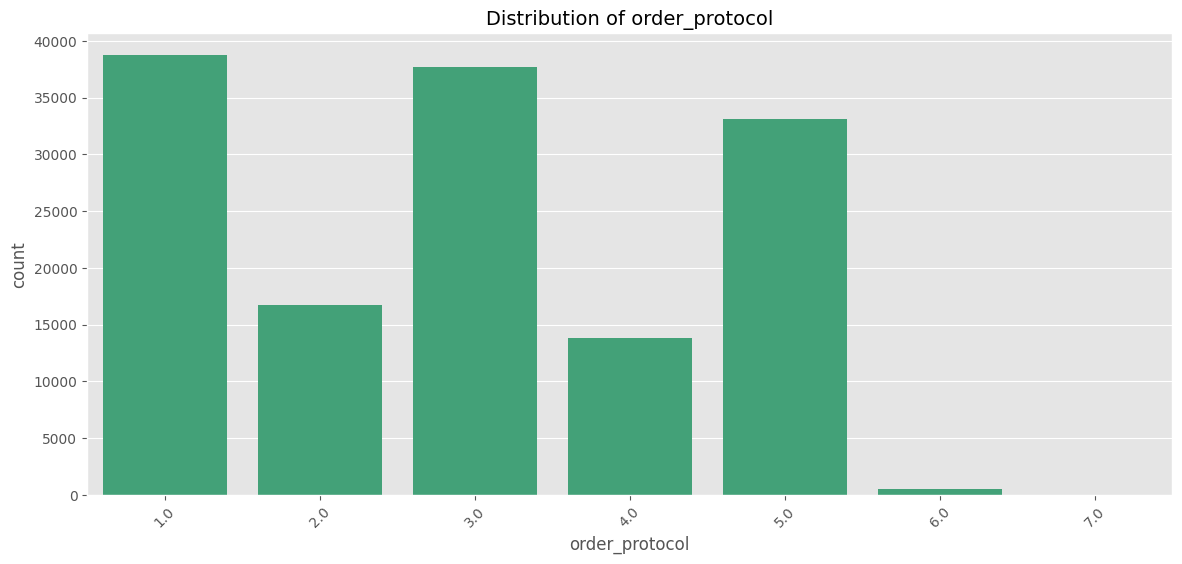

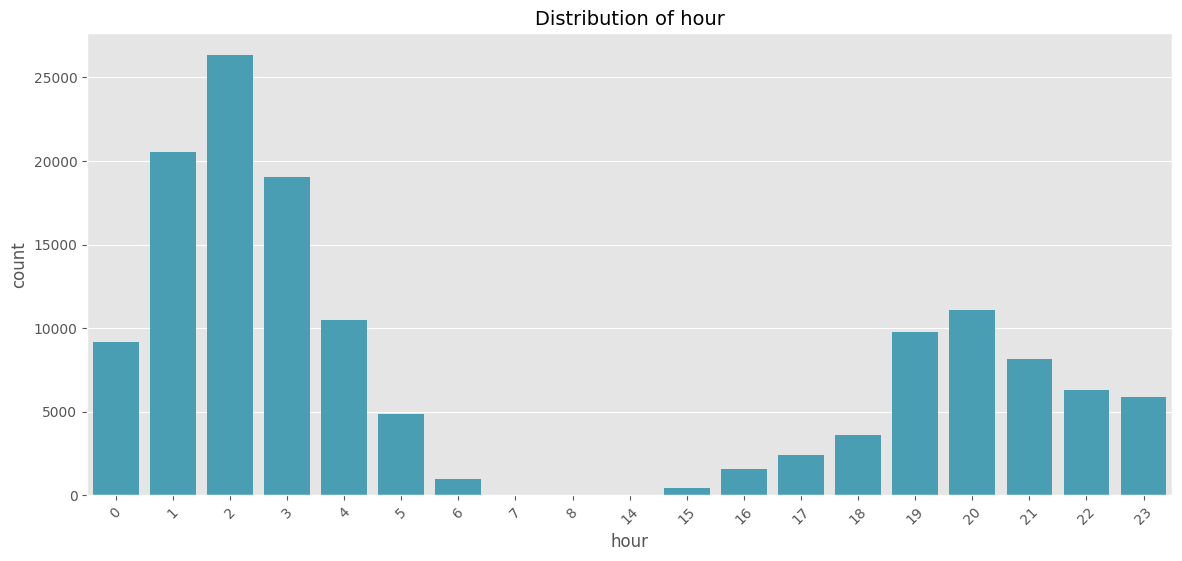

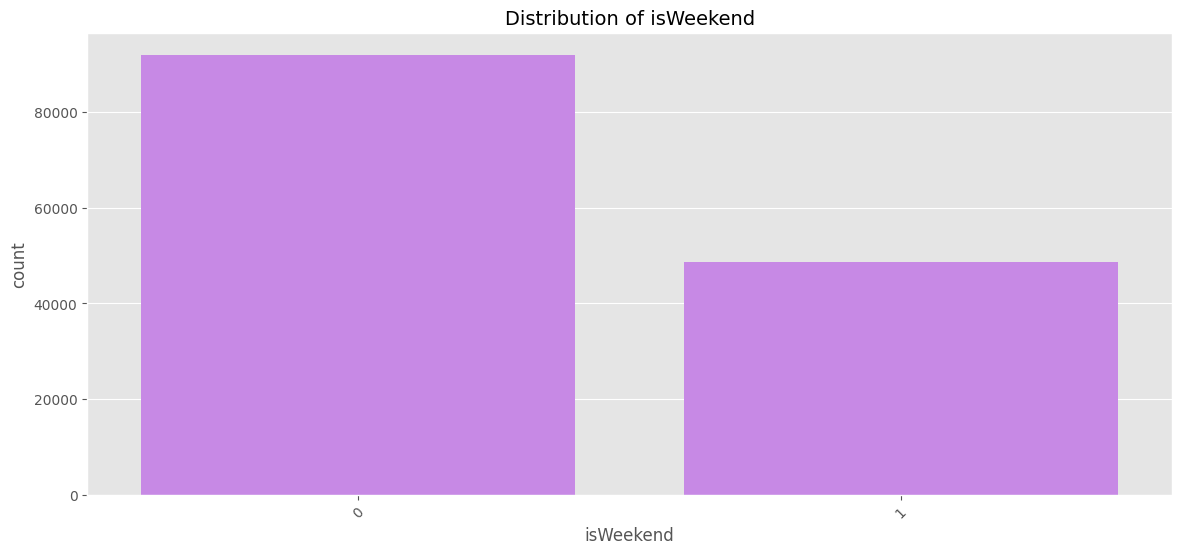

In [15]:
# Distribution of categorical columns
colors = sns.color_palette("husl", len(categorical_cols))

for col, color in zip(categorical_cols, colors):
    plt.figure(figsize=(14, 6))  
    sns.countplot(x=X_train[col], palette=[color])  
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xticks(rotation=45)  
    plt.show()  

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

Text(0, 0.5, 'Frequency')

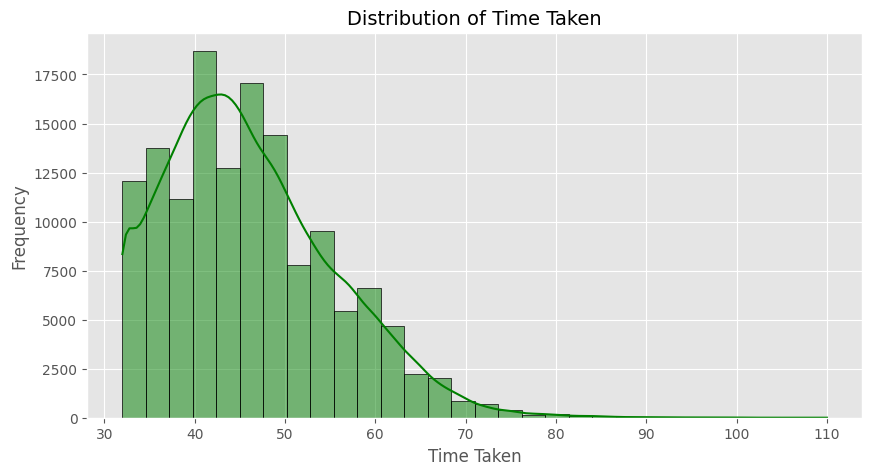

In [22]:
# Distribution of time_taken

plt.figure(figsize=(10, 5))
sns.histplot(y_train, bins=30, kde=True, color='green', edgecolor='black')

plt.title("Distribution of Time Taken", fontsize=14)
plt.xlabel("Time Taken")
plt.ylabel("Frequency")

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

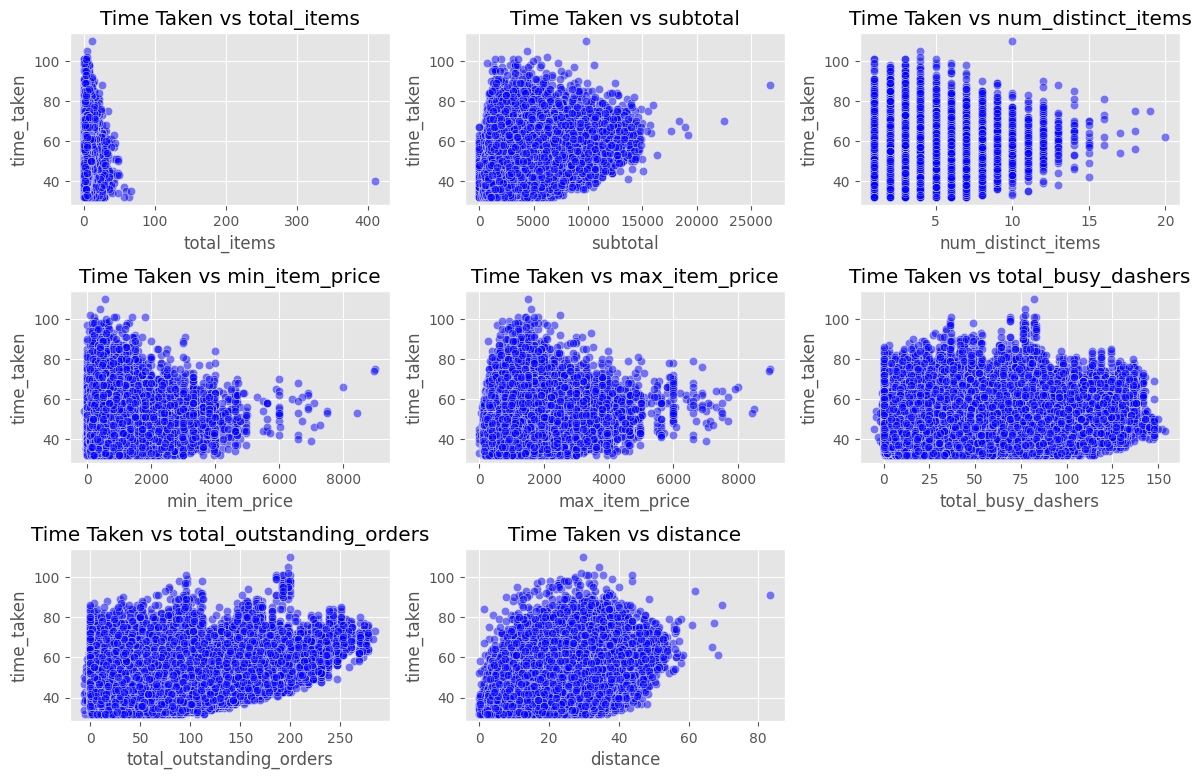

In [23]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)  
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5, color='blue')
    plt.title(f"Time Taken vs {col}")

plt.tight_layout()
plt.show()

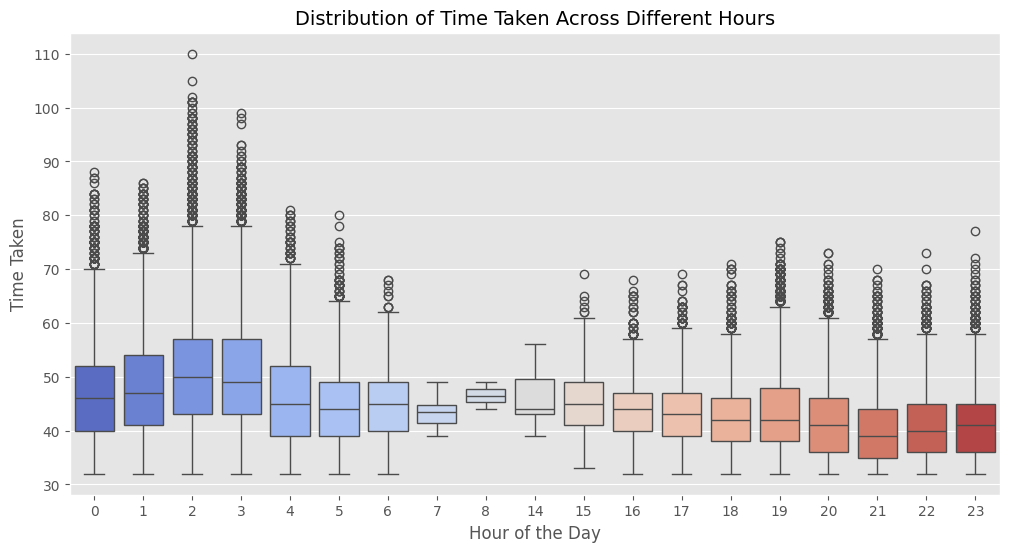

In [312]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(x=X_train['hour'], y=y_train, palette="coolwarm")

plt.title("Distribution of Time Taken Across Different Hours", fontsize=14)
plt.xlabel("Hour of the Day")
plt.ylabel("Time Taken")

plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

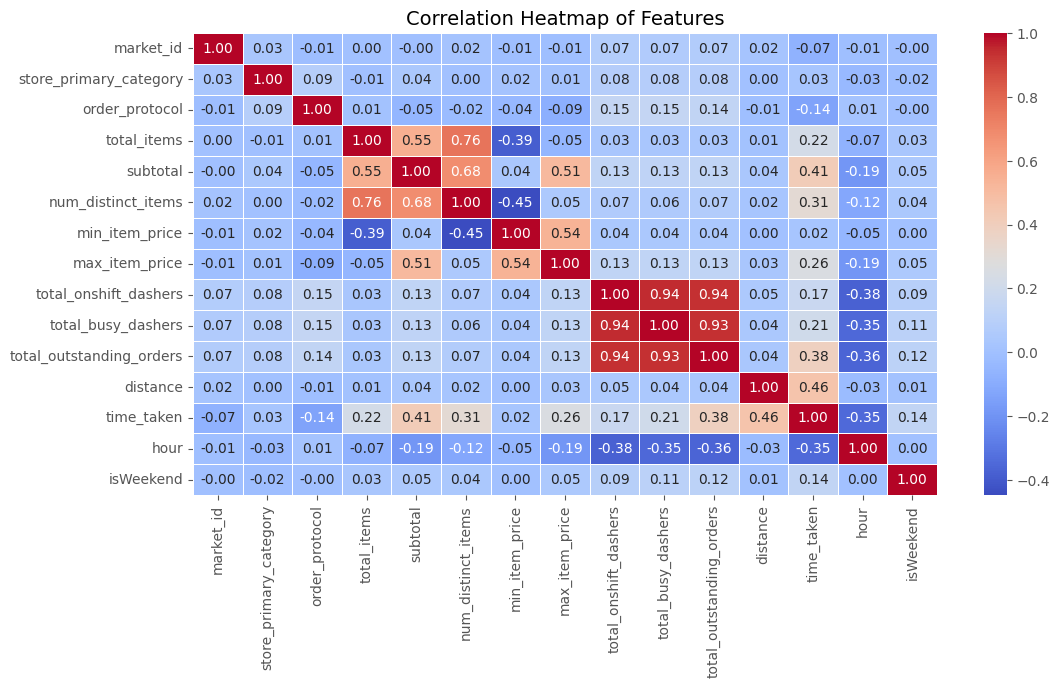

In [24]:
# Plot the heatmap of the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [25]:
# Drop 3-5 weakly correlated columns from training dataset
corr_with_target = X_train.corrwith(y_train).abs()
weak_features = corr_with_target[corr_with_target < 0.1].index.tolist()

X_train = X_train.drop(columns=weak_features)
#X_test = X_test.drop(columns=weak_features)

print("Dropped columns:", weak_features)


Dropped columns: ['market_id', 'store_primary_category', 'min_item_price']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

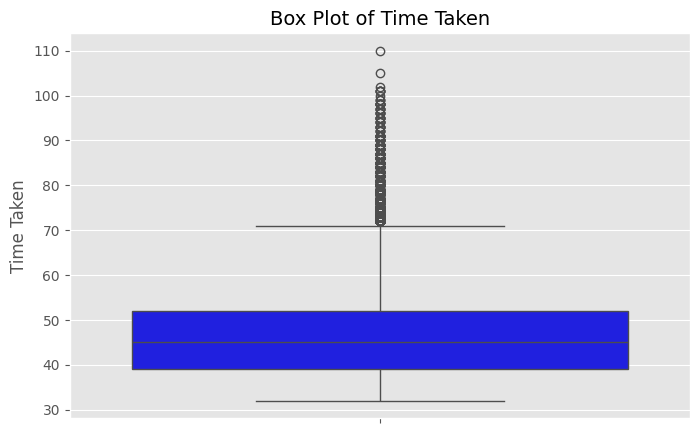

In [26]:
# Boxplot for time_taken

plt.figure(figsize=(8, 5))
sns.boxplot(y=y_train, color='blue')
plt.title("Box Plot of Time Taken", fontsize=14)
plt.ylabel("Time Taken")

plt.show()

In [27]:
y_train = y_train[y_train <= 70 ]

X_train = X_train.loc[y_train.index]

print("New X_train shape:", X_train.shape)
print("New y_train shape:", y_train.shape)

New X_train shape: (138973, 10)
New y_train shape: (138973,)


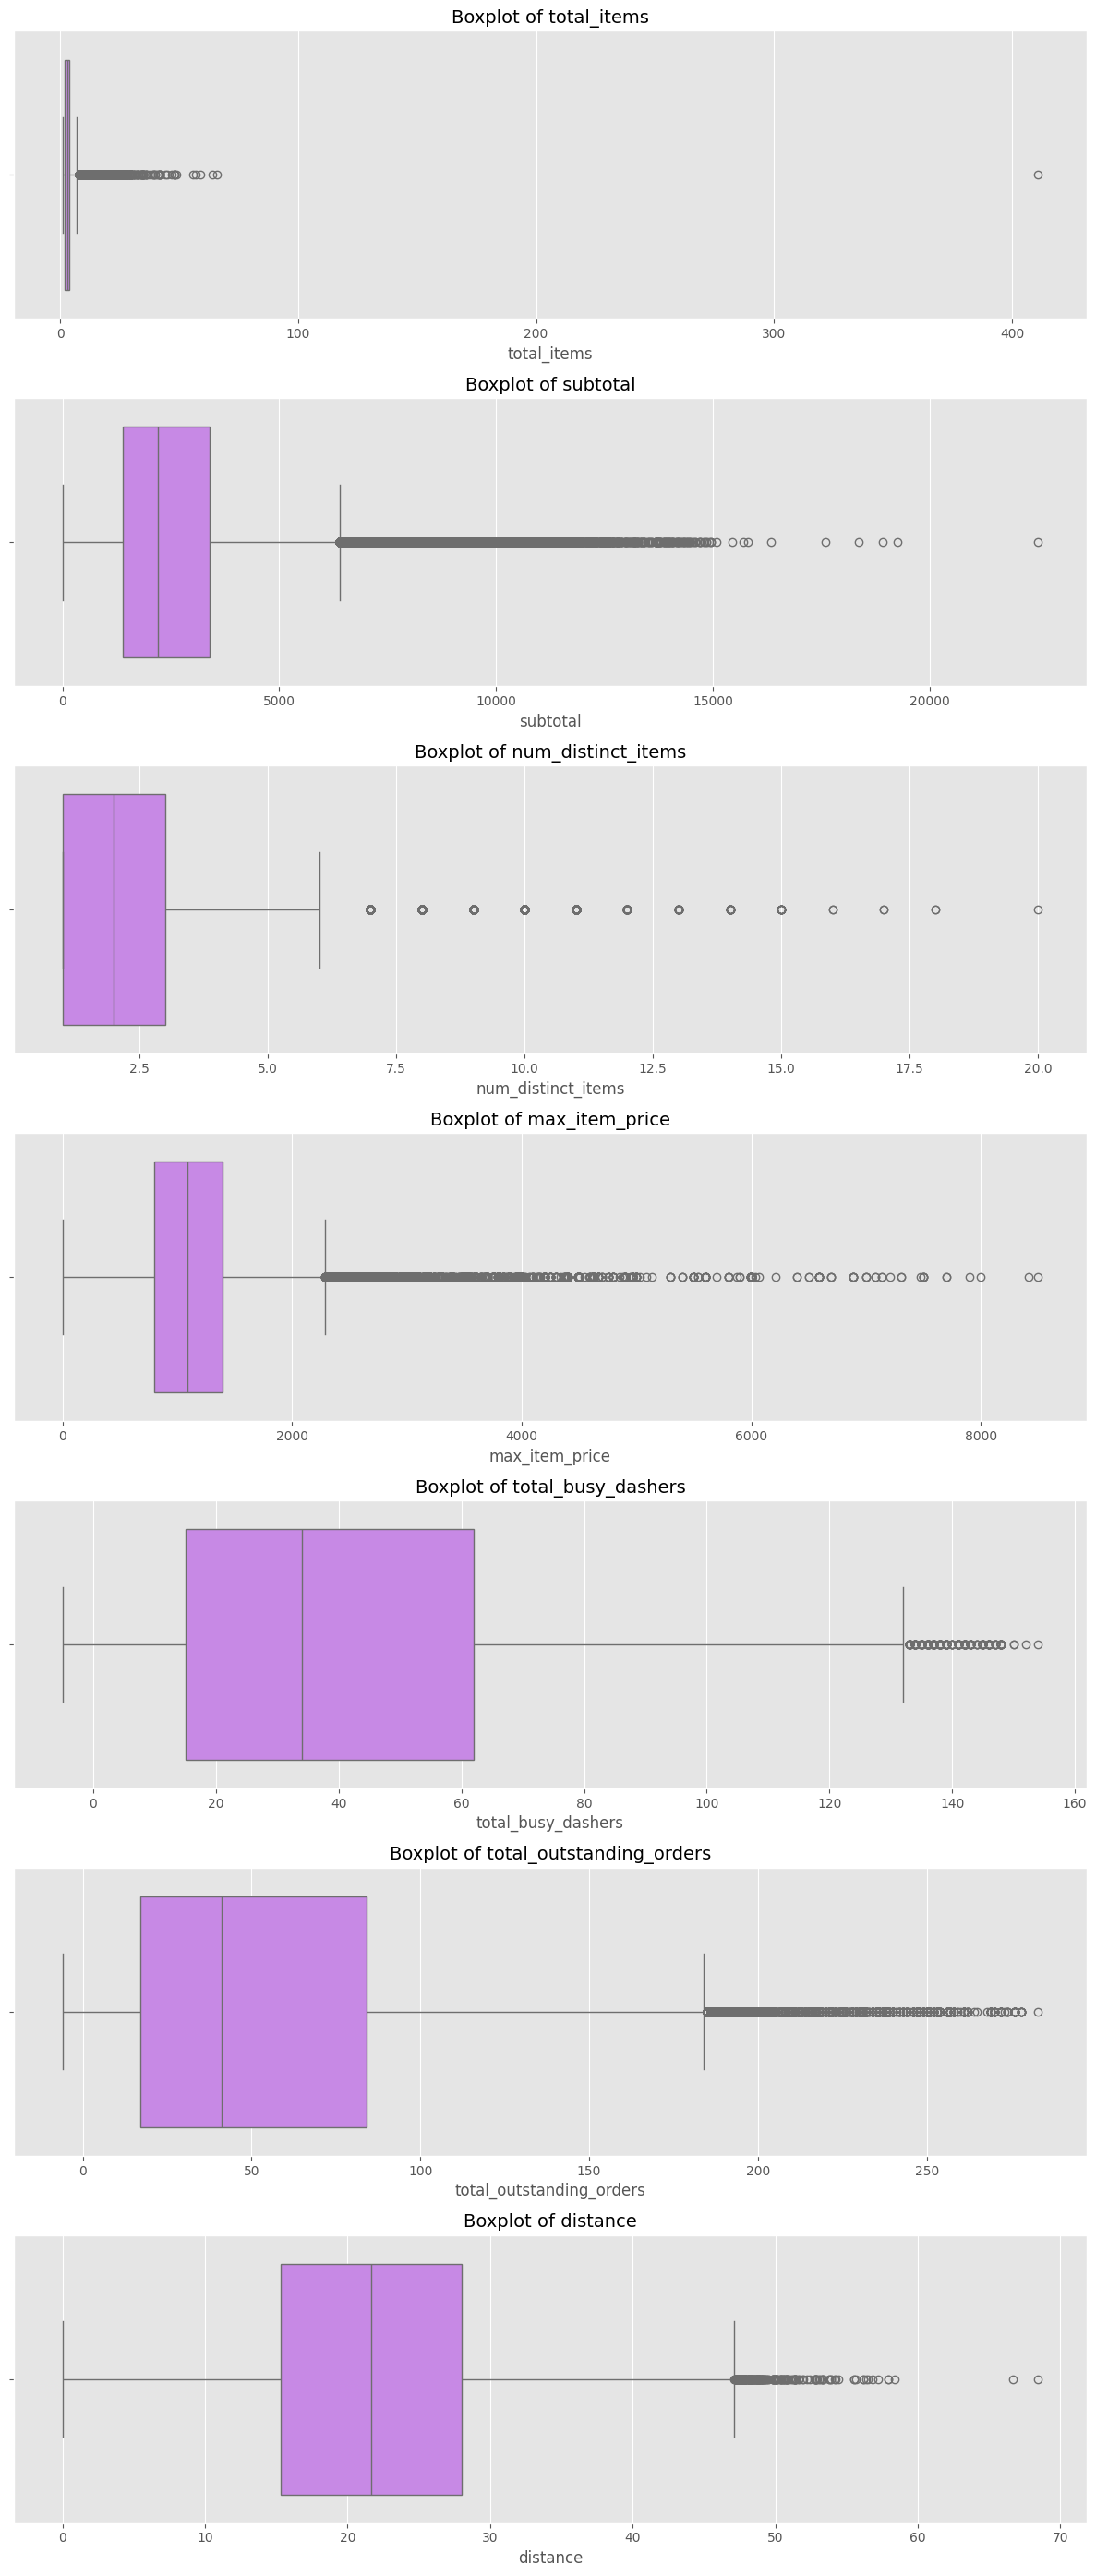

In [29]:
numerical_cols = X_train.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, len(numerical_cols) * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)  
    sns.boxplot(x=X_train[col], palette=[color])
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [36]:
# Handle outliers
X_train = X_train[X_train['total_items'] <= 7]
X_train = X_train[X_train['subtotal'] <= 12000]
X_train = X_train[X_train['num_distinct_items'] < 7]
X_train = X_train[X_train['max_item_price'] <= 4000]
X_train = X_train[X_train['total_outstanding_orders'] <= 250]
X_train = X_train[X_train['distance'] <= 55 ]

y_train = y_train.loc[X_train.index]

print(X_train.shape)
print(y_train.shape)


(131102, 10)
(131102,)


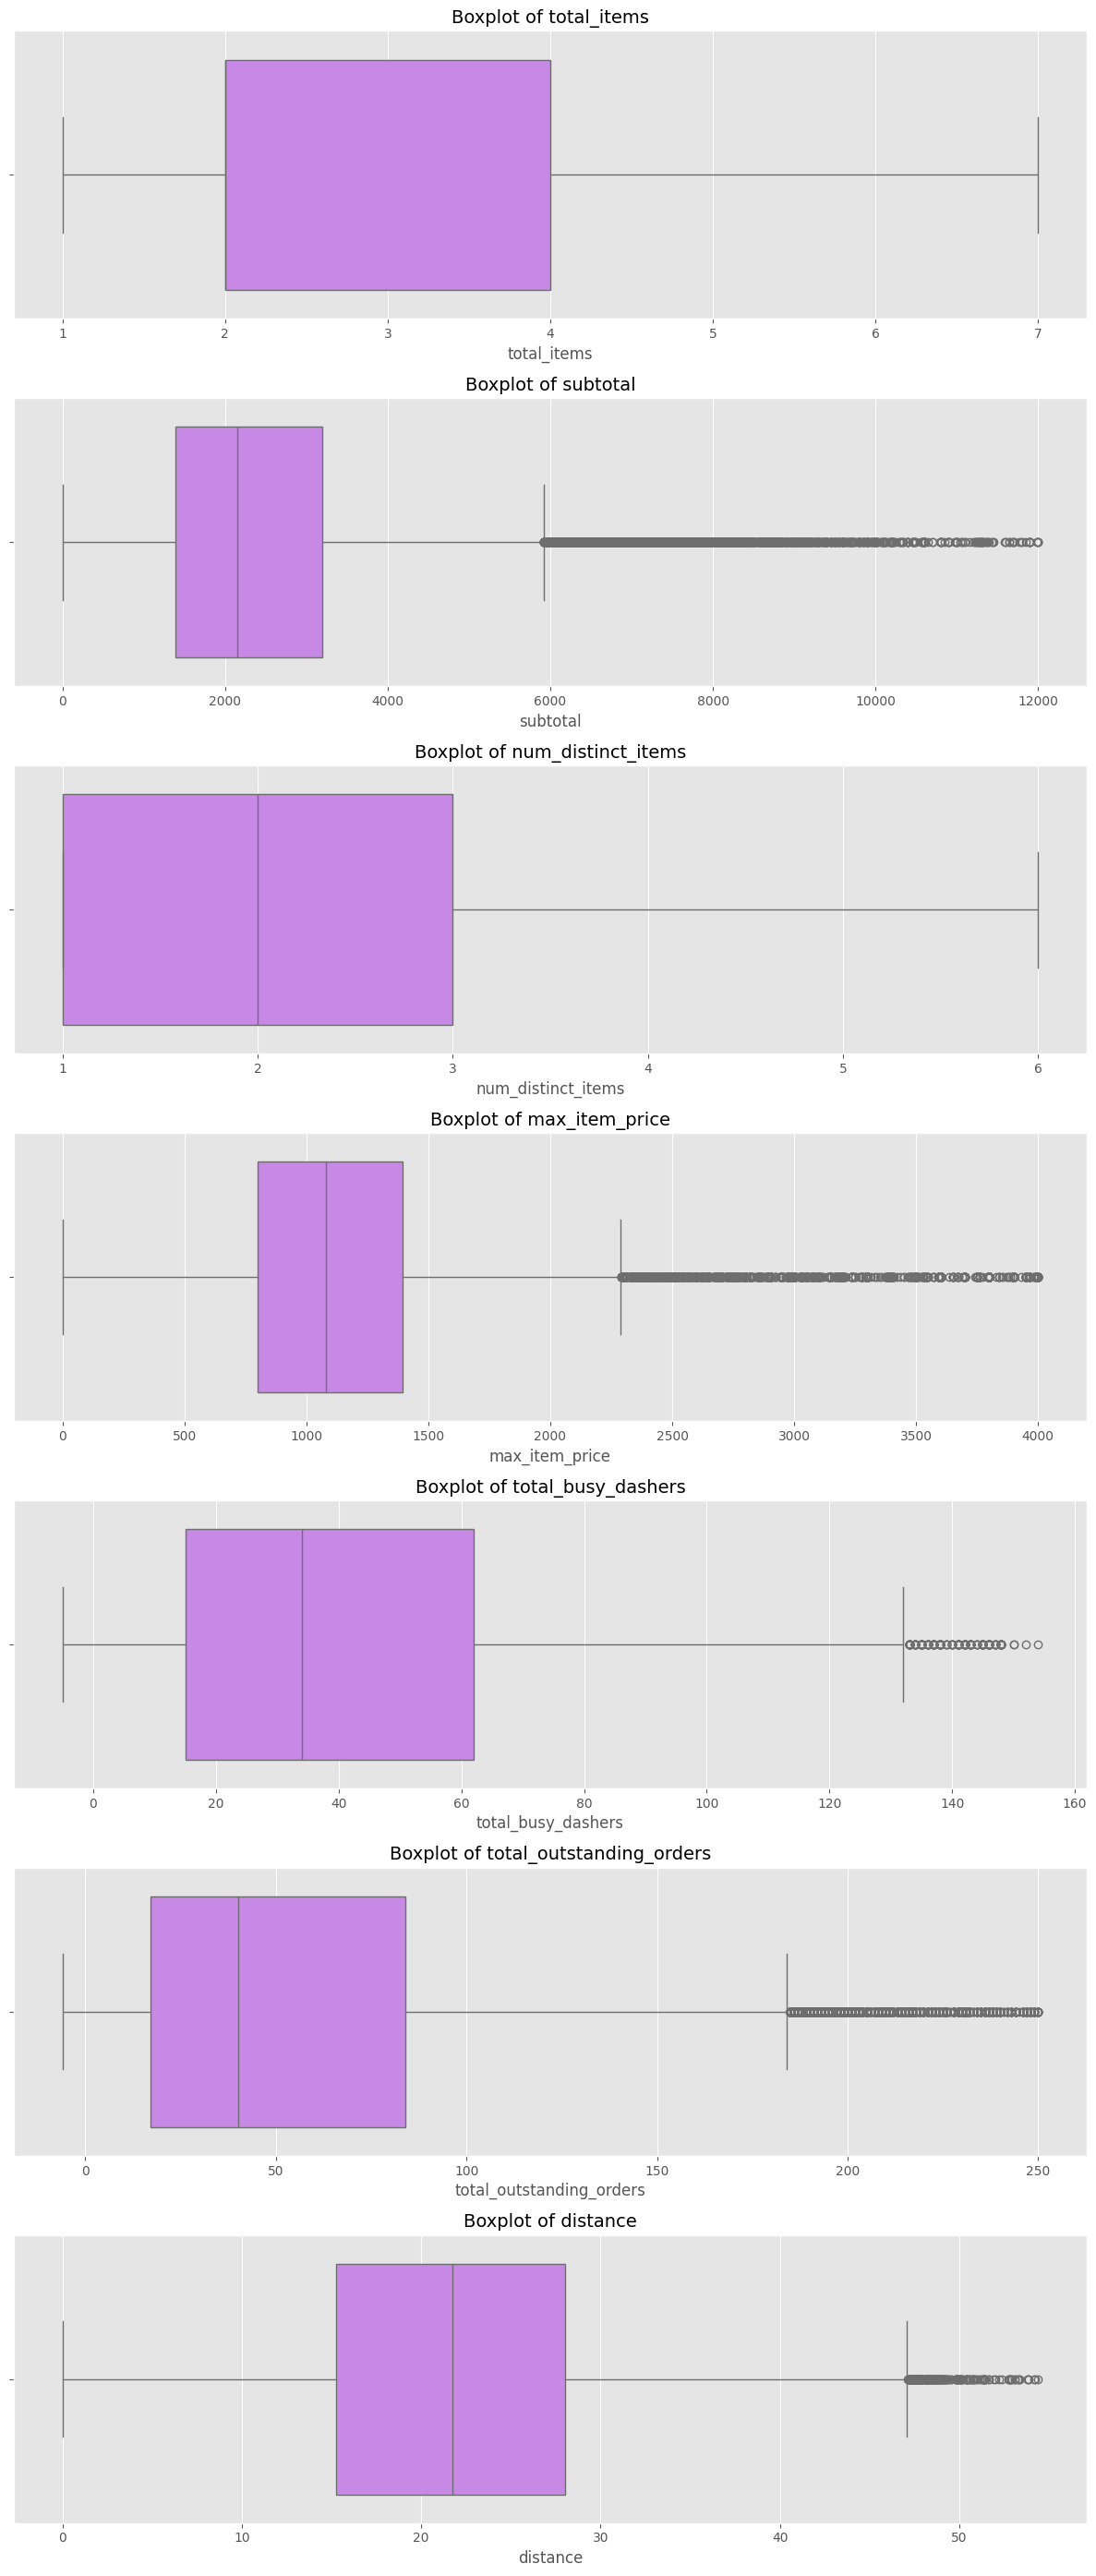

In [37]:
numerical_cols = X_train.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, len(numerical_cols) * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)  
    sns.boxplot(x=X_train[col], palette=[color])
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [38]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_test.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical Columns: ['market_id', 'store_primary_category', 'order_protocol', 'hour', 'isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

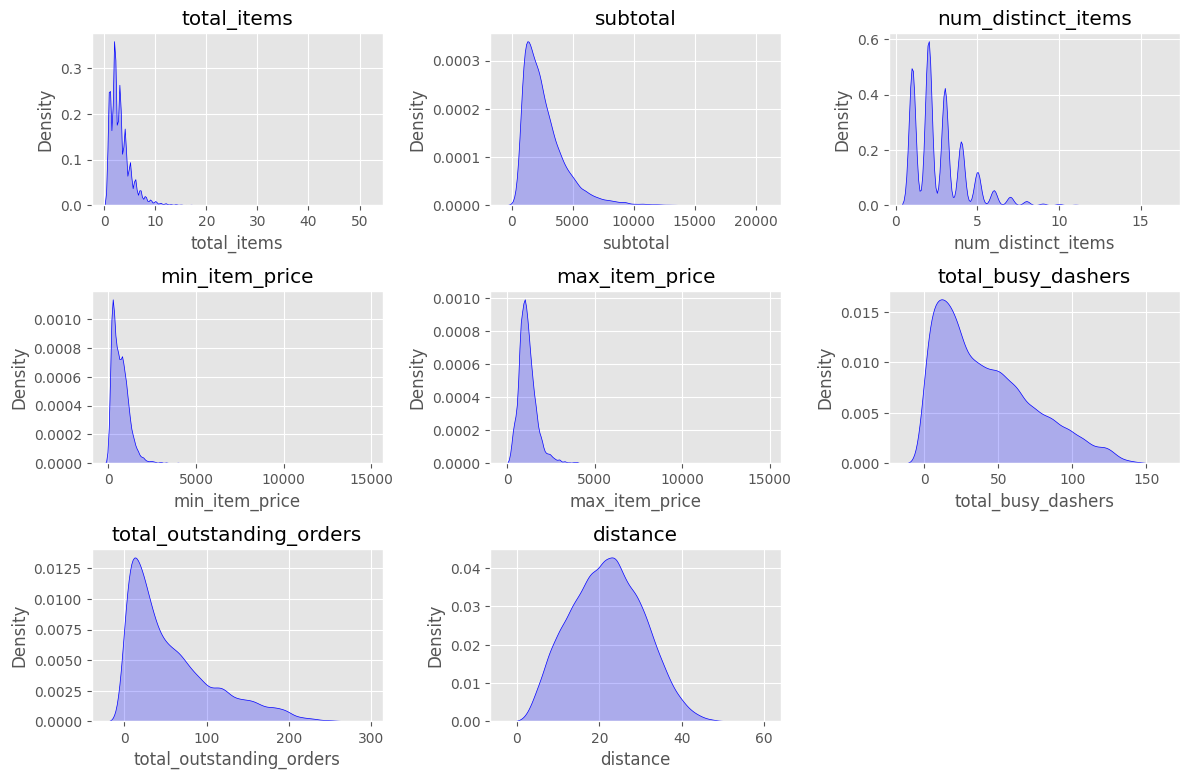

In [39]:
# Plot distributions for all numerical columns

plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.kdeplot(X_test[col], fill=True, color='blue')
    plt.title(col)

plt.tight_layout()
plt.show()

##### **4.1.2**
Check the distribution of categorical features

<Figure size 1200x600 with 0 Axes>

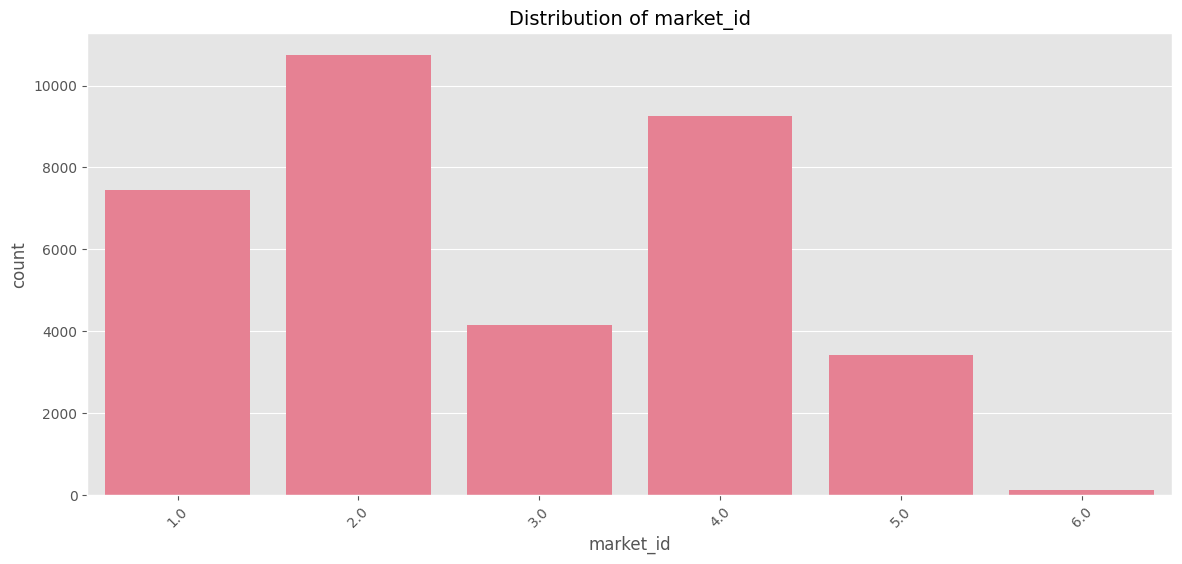

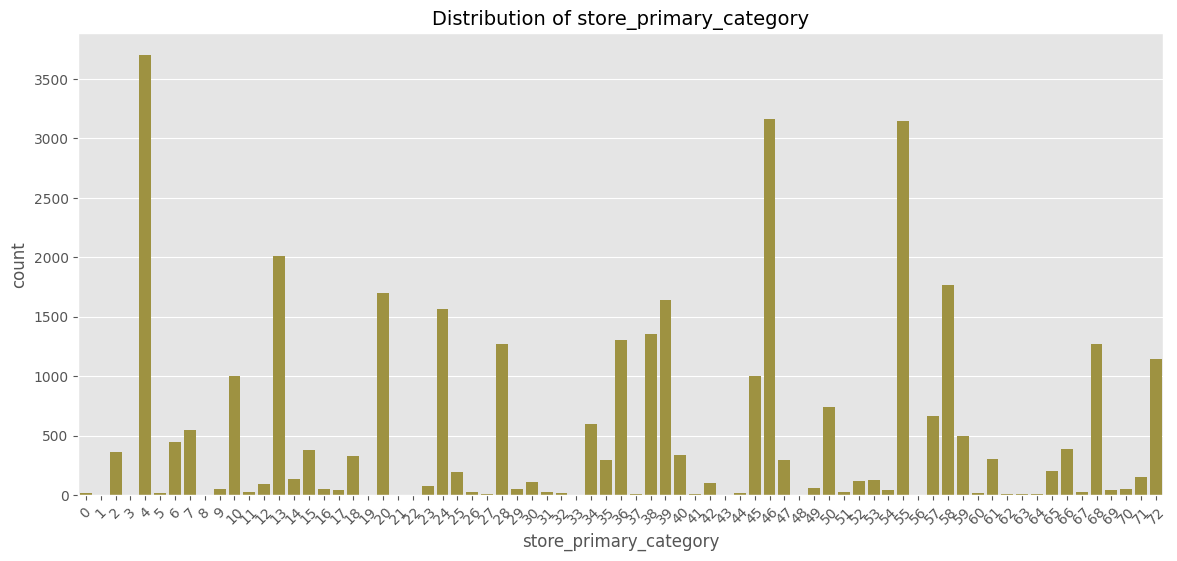

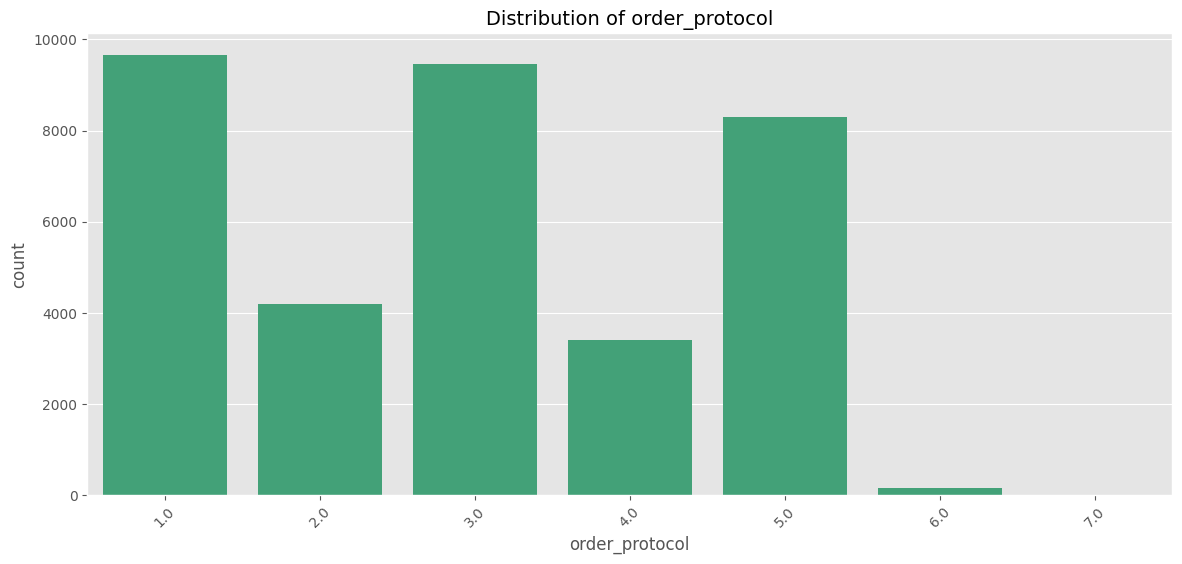

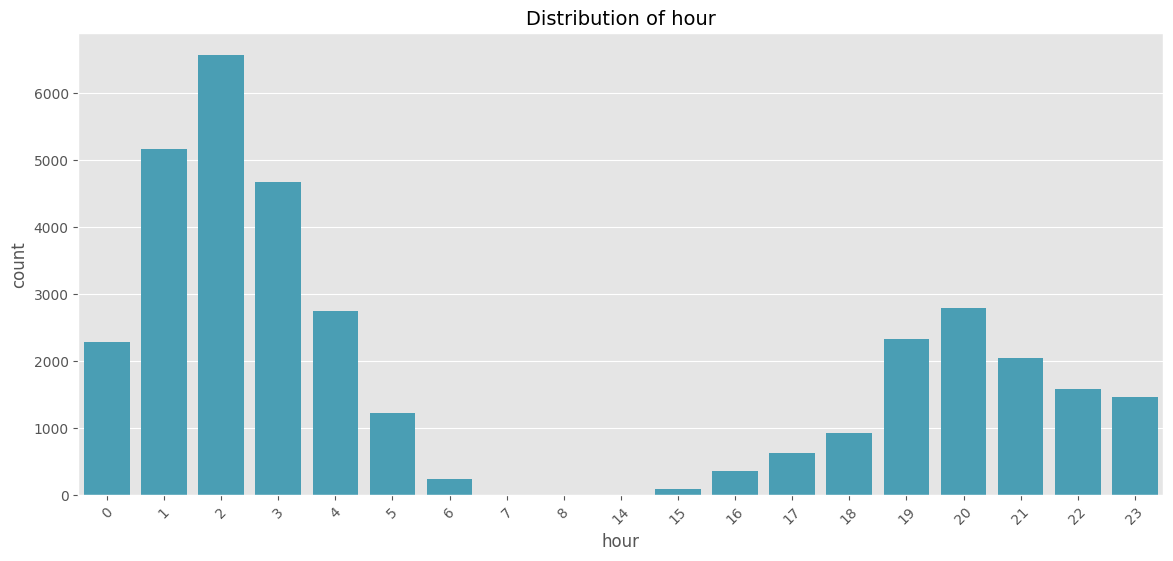

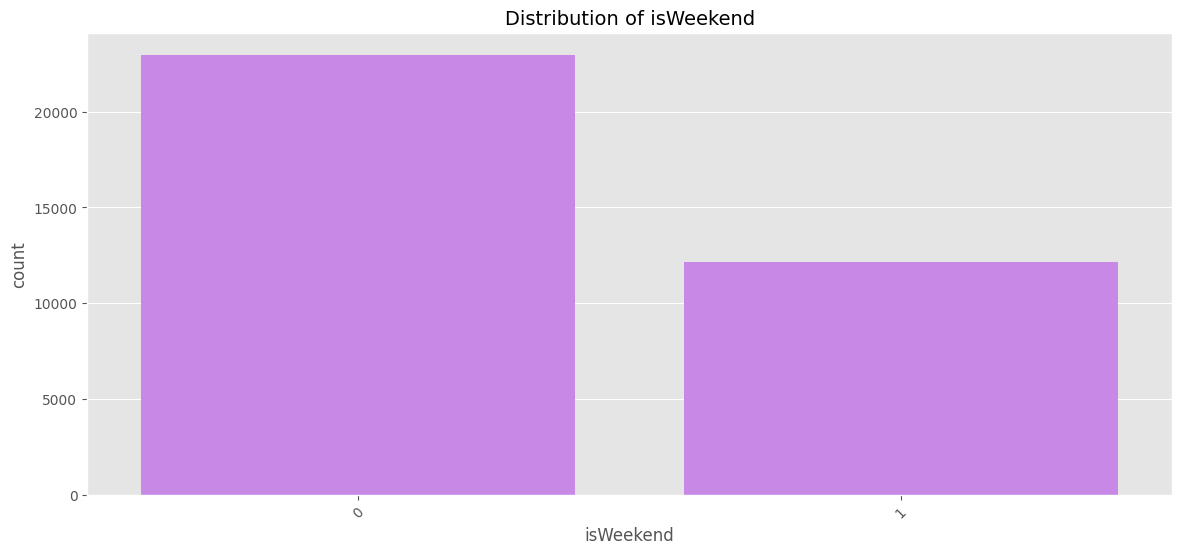

<Figure size 640x480 with 0 Axes>

In [40]:
# Distribution of categorical columns

plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(categorical_cols))

for col, color in zip(categorical_cols, colors):
    plt.figure(figsize=(14, 6))  
    sns.countplot(x=X_test[col], palette=[color])  
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xticks(rotation=45)  
    plt.show()  

plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

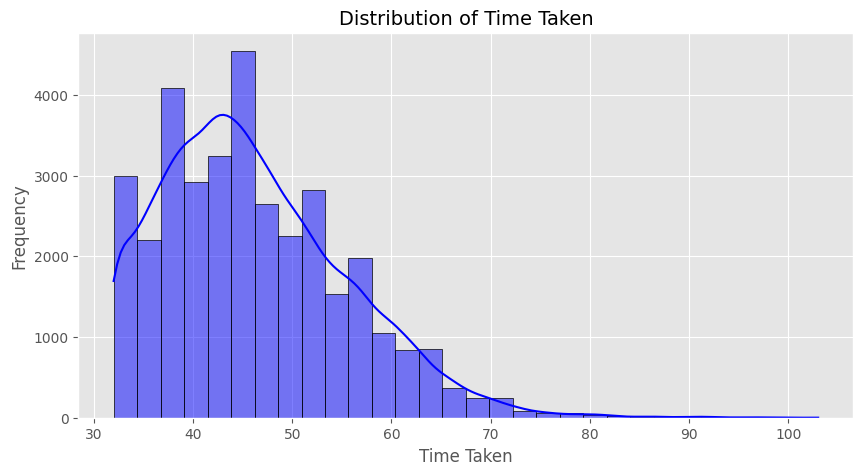

In [41]:
# Distribution of time_taken

plt.figure(figsize=(10, 5))

sns.histplot(y_test, bins=30, kde=True, color='blue', edgecolor='black')

plt.title("Distribution of Time Taken", fontsize=14)
plt.xlabel("Time Taken")
plt.ylabel("Frequency")

plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

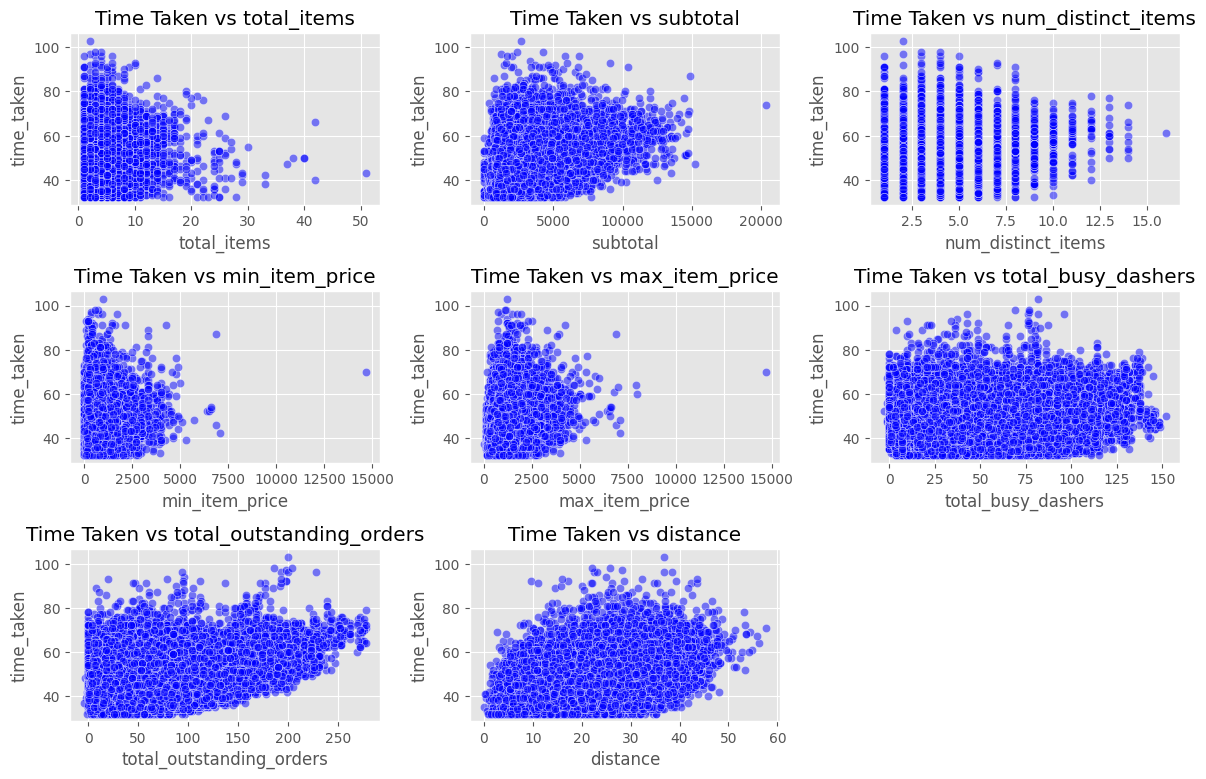

In [42]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i) 
    sns.scatterplot(x=X_test[col], y=y_test, alpha=0.5, color='blue')
    plt.title(f"Time Taken vs {col}")

plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [43]:
# Drop the weakly correlated columns from training dataset
corr_with_target = X_test.corrwith(y_test).abs()
weak_features = corr_with_target[corr_with_target < 0.1].index.tolist()

X_test = X_test.drop(columns=weak_features)

print("Dropped columns:", weak_features)


Dropped columns: ['market_id', 'store_primary_category', 'min_item_price']


In [44]:
y_test = y_test[y_test <= 70 ]

X_test = X_test.loc[y_test.index]

print("New X_train shape:", X_test.shape)
print("New y_train shape:", y_test.shape)

New X_train shape: (34713, 10)
New y_train shape: (34713,)


In [45]:
X_test = X_test[X_test['total_items'] <= 7]
X_test = X_test[X_test['subtotal'] <= 12000]
X_test = X_test[X_test['num_distinct_items'] < 7]
X_test = X_test[X_test['max_item_price'] <= 4000]
#X_test = X_test[X_test['total_onshift_dashers'] <= 150]
X_test = X_test[X_test['total_outstanding_orders'] <= 250]
X_test = X_test[X_test['distance'] <= 55 ]



y_test = y_test.loc[X_test.index]

print(X_test.shape)
print(y_test.shape)

(32743, 10)
(32743,)


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [46]:
# Import libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [47]:
# Apply scaling to the numerical columns
X_train_scaler = X_train.copy()
X_test_scaler  = X_test.copy()

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X_train_scaler[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaler[numerical_cols] = scaler.transform(X_test[numerical_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [48]:
# Create/Initialise the model
model = LinearRegression()

In [49]:
# Train the model using the training data
model.fit(X_train_scaler, y_train)

LinearRegression()

In [50]:
# Make predictions
y_pred = model.predict(X_test_scaler)

In [51]:
predictions_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Display first few rows
print(predictions_df.head(10))

        Actual  Predicted
50609     50.0  49.885780
49181     69.0  60.297912
4526      41.0  41.250865
131       45.0  42.226060
57096     40.0  42.174821
114801    36.0  34.481197
72284     34.0  38.054954
171774    43.0  44.656621
83830     32.0  31.864778
33555     46.0  49.368122


In [52]:
# Find results for evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"📊 Model Evaluation Metrics:")
print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
print(f"✅ Mean Squared Error (MSE): {mse:.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")


📊 Model Evaluation Metrics:
✅ Mean Absolute Error (MAE): 3.5183
✅ Mean Squared Error (MSE): 21.4668
✅ Root Mean Squared Error (RMSE): 4.6332
✅ R² Score: 0.7071


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [88]:
# Loop through the number of features and test the model

base_model = LinearRegression()
rfe = RFE(estimator=base_model, n_features_to_select=8)

rfe.fit(X_train_scaler, y_train)

selected_features = X_train_scaler.columns[rfe.support_].tolist()
print("✅ Selected Features:", selected_features)

✅ Selected Features: ['order_protocol', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend']


In [89]:
# Build the final model with selected number of features
X_train_rfe = X_train_scaler[selected_features]
X_test_rfe = X_test_scaler[selected_features]

X_train_selected = X_train_scaler[selected_features]
X_test_selected = X_test_scaler[selected_features]

final_model = LinearRegression()
final_model.fit(X_train_selected, y_train)

y_pred_selected = final_model.predict(X_test_selected)



In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical features
numerical_cols = X_train_selected.select_dtypes(include=['int64', 'float64']).columns

# Compute VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_cols
vif_data["VIF"] = [variance_inflation_factor(X_train_selected[numerical_cols].values, i) for i in range(len(numerical_cols))]

# Display VIF values
print(vif_data)

                    Feature       VIF
0                  subtotal  3.074318
1        num_distinct_items  2.045878
2            max_item_price  1.907195
3        total_busy_dashers  7.862725
4  total_outstanding_orders  7.857800
5                  distance  1.002975


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

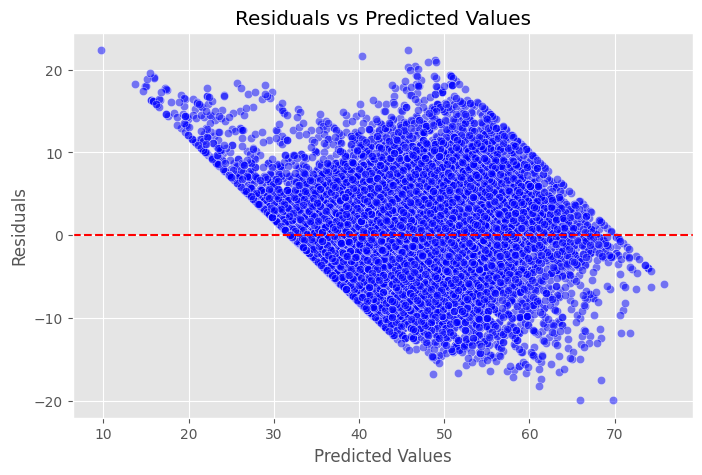

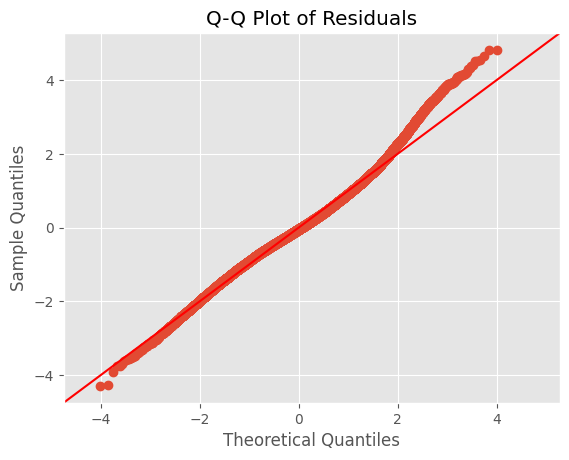

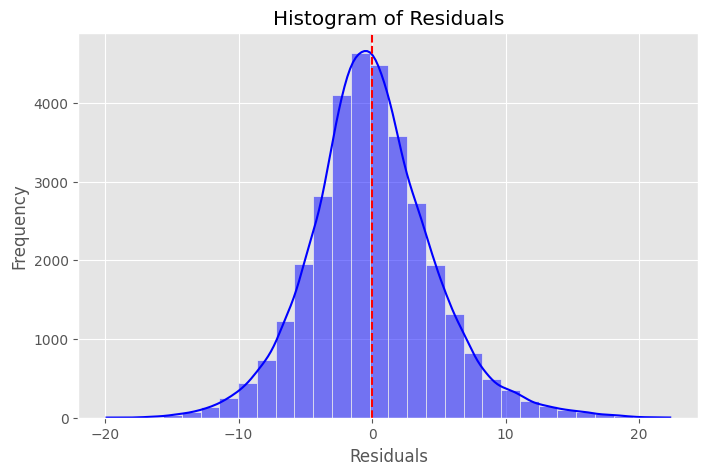

In [87]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals = y_test - y_pred_selected
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_selected, y=residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [91]:
# Compare the scaled vs unscaled features used in the final model

model_unscaled = LinearRegression()
model_unscaled.fit(X_train[selected_features], y_train)
y_pred_unscaled = model_unscaled.predict(X_test[selected_features])

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])

# Train on Scaled Data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Get Metrics
metrics_unscaled = evaluate_model(y_test, y_pred_unscaled)
metrics_scaled = evaluate_model(y_test, y_pred_scaled)

# Print Comparison
print(f"📊 Model Performance Comparison:")
print(f"{'Metric':<15}{'Unscaled':<15}{'Scaled':<15}")
print(f"{'-'*45}")
print(f"MAE:         {metrics_unscaled[0]:.4f}     {metrics_scaled[0]:.4f}")
print(f"MSE:         {metrics_unscaled[1]:.4f}     {metrics_scaled[1]:.4f}")
print(f"RMSE:        {metrics_unscaled[2]:.4f}     {metrics_scaled[2]:.4f}")
print(f"R² Score:    {metrics_unscaled[3]:.4f}     {metrics_scaled[3]:.4f}")

coeff_unscaled = pd.Series(model_unscaled.coef_, index=selected_features)
coeff_scaled = pd.Series(model_scaled.coef_, index=selected_features)

# Print Comparison
print("\n📌 Feature Importance Comparison:")
print(pd.DataFrame({'Unscaled Coefficients': coeff_unscaled, 'Scaled Coefficients': coeff_scaled}))

📊 Model Performance Comparison:
Metric         Unscaled       Scaled         
---------------------------------------------
MAE:         3.7836     3.7836
MSE:         23.8672     23.8672
RMSE:        4.8854     4.8854
R² Score:    0.6743     0.6743

📌 Feature Importance Comparison:
                          Unscaled Coefficients  Scaled Coefficients
order_protocol                        -0.793788            -1.205539
subtotal                               0.001313             1.948910
num_distinct_items                     0.506263             0.643077
max_item_price                         0.000935             0.482698
total_busy_dashers                    -0.322486           -10.289537
total_outstanding_orders               0.240272            12.359604
distance                               0.456147             3.970921
isWeekend                              1.748082             0.831069


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

📌 A unit increase in 'distance' changes the target variable by 11.9121 units.


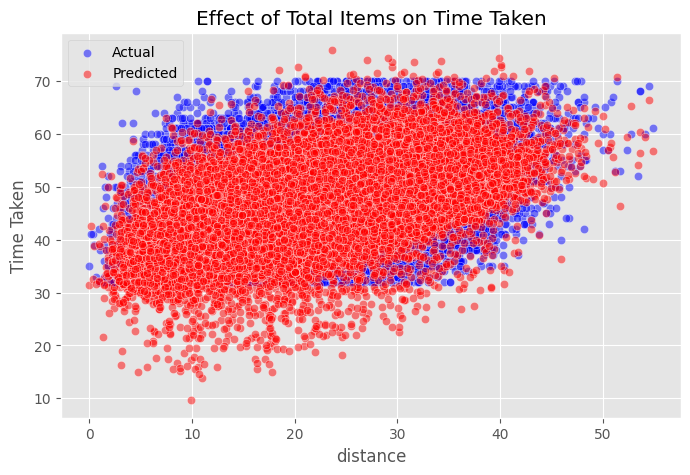

In [92]:
# Analyze the effect of a unit change in a feature, say 'distance'

coef_total_items = model.coef_[selected_features.index('distance')]

print(f"📌 A unit increase in 'distance' changes the target variable by {coef_total_items:.4f} units.")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['distance'], y=y_test, label="Actual", alpha=0.5, color='blue')
sns.scatterplot(x=X_test['distance'], y=y_pred, label="Predicted", alpha=0.5, color='red')
plt.xlabel("distance")
plt.ylabel("Time Taken")
plt.title("Effect of Total Items on Time Taken")
plt.legend()
plt.show()

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?


**Answer:**
>

##### store_primary_category (coef = 0.0057, p-value < 0.05)
While statistically significant, its effect on delivery time is minimal.
Some categories (e.g., restaurants) might have slightly longer preparation times, affecting time_taken.

##### order_protocol (coef = -0.6788, p-value < 0.05)
Strong negative correlation suggests that certain order protocols reduce delivery time.
Some protocols may be optimized for faster dispatching and delivery.

##### market_id (coef = -0.6225, p-value < 0.05)
Negative impact on time_taken, indicating that some markets operate more efficiently than others.
Location-specific factors (e.g., traffic congestion, density of available dashers) may play a role.

##### day_of_week (coef = -0.1190, p-value < 0.05)
A small negative impact suggests slightly faster deliveries on certain days.
Possible reasons: lower order volumes or different courier availability.

##### isWeekend (coef = 1.6371, p-value < 0.05)
Positive coefficient indicates deliveries take longer on weekends.
Possible reasons: higher order volumes, increased demand, and fewer available dashers.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?



**Answer:**
>

means 20% of the total dataset is reserved for testing, while the remaining 80% is used for training.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

Distance

---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

Created boxplots for numerical variables to visually detect extreme values.
Outliers appear as points outside the whiskers of the boxplot.


---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

1. total_outstanding_orders (coef = 0.3465)
The number of pending orders significantly increases the time taken.
High demand leads to more delays.

2. distance (coef = 0.4766)
As delivery distance increases, the time taken increases significantly.
This is expected since longer distances require more travel time.

3. total_onshift_dashers (coef = -0.3593)
More available on-duty drivers (dashers) lead to shorter delivery times.
This makes sense: more drivers → faster assignment → quicker deliveries.

---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


Linear Regression is a supervised learning algorithm used for predicting continuous values based on one or more input variables (features). It assumes a linear relationship between the independent variables (X) and the dependent variable (Y).

---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

SLR models the relationship between one independent variable (X) and a dependent variable (Y) but MLR models the relationship between two or more independent variables (X₁, X₂, …) and a dependent variable (Y).

---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>


The cost function is crucial in linear regression as it measures model error. Minimizing the cost function using OLS or Gradient Descent ensures the best-fitting line for predictions.

---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

Overfitting occurs when a model learns noise, performing well on training data but poorly on new data. Underfitting happens when a model is too simple, failing to capture patterns in data.

---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**


Residual plots diagnose linear regression by revealing randomness (good fit), patterns (non-linearity), heteroscedasticity (unequal variance), and outliers. A well-fitted model shows residuals randomly scattered around zero without patterns.